In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

pd.options.display.float_format='{:.2f}'.format

df = pd.read_csv('../data/000015', index_col= 'Date', names=['Date', 'Open', 'Close', 'High', 'Low', 'Volume', 'Money', 'PE', 'PB'], parse_dates=True, header=None)
df['Return'] = df['Close'].pct_change() * 100
df['Year'] = [i.year for i in df.index]
df['Month'] = [i.month for i in df.index]
df['Day'] = [i.day for i in df.index]

# Descriptive statistics versus inferential statistics

# Measures of central tendency


## The mean
## The median
## The mode

# Measures of variability, dispersion, or spread

## Range

## Quartile

In [ ]:
from scipy.stats.mstats import mquantiles

sorted_close = np.sort(df['Close'])
mquantiles(sorted_close)

[np.percentile(sorted_close, perc) for perc in [0, 25,50,75, 100]]

## Deviation and variance

# Hypothesis testing - the null and alternative hypotheses

## The null and alternative hypotheses

### The alpha and p-values

### Type I and Type II errors

## Statistical hypothesis tests

### The z-test

### The t-test

## Confidence intervals

## Correlation and linear regression

### Correlation

### Linear regression

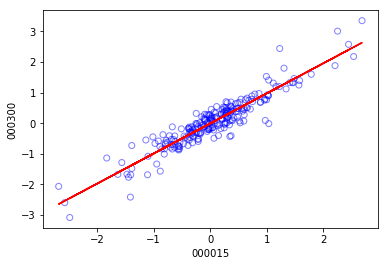

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Return1   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1624.
Date:                Thu, 30 Mar 2017   Prob (F-statistic):          4.99e-108
Time:                        16:27:34   Log-Likelihood:                -34.781
No. Observations:                 239   AIC:                             73.56
Df Residuals:                     237   BIC:                             80.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0166      0.018      0.911      0.363        -0.019     0.052
Return2        0.8865      0.022     40.294      0.000         0.843     0.930
==============================================================================
Omnibus:                       10.726   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               23.271
Skew:                           0.020   Prob(JB):                     8.85e-06
Kurtosis:                       4.528   Cond. No.                         1.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
%matplotlib inline

pd.options.display.float_format='{:.2f}'.format

df1 = pd.read_csv('../data/000015', index_col= 'Date', names=['Date', 'Open', 'Close', 'High', 'Low', 'Volume', 'Money', 'PE', 'PB'], parse_dates=True, header=None)[-240:]
df1['Return'] = df1['Close'].pct_change() * 100
df2 = pd.read_csv('../data/000300', index_col= 'Date', names=['Date', 'Open', 'Close', 'High', 'Low', 'Volume', 'Money', 'PE', 'PB'], parse_dates=True, header=None)[-240:]
df2['Return'] = df2['Close'].pct_change() * 100

plt.scatter(df1['Return'], df2['Return'], marker='o', edgecolor='b', facecolor='none', alpha=0.5)
plt.xlabel('000015')
plt.ylabel('000300')

slope, intercept = np.polyfit(df1['Return'][1:],df2['Return'][1:],1)
plt.plot(df1['Return'],df1['Return']*slope + intercept,'r')
plt.show()

df3 = pd.concat([df1['Return'][1:], df2['Return'][1:]], axis=1)
df3.columns = ['Return1', 'Return2']
results = sm.ols('Return1 ~ Return2', df3).fit()
results.summary()
